In [1]:
%matplotlib inline
%load_ext autoreload

In [2]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('../../mbspbs10pc')

from mbspbs10pc import utils

# Check MBS-PBS 10% data availability

In [3]:
ROOT = os.path.join('..','..','..','data')

mbs_files = filter(lambda x: x.startswith('MBS'), os.listdir(ROOT))
pbs_files = filter(lambda x: x.startswith('PBS'), os.listdir(ROOT))
sample_pin_lookout = filter(lambda x: x.startswith('SAMPLE'), os.listdir(ROOT))[0]

print('MBS files:')
for mbs in mbs_files:
    print('{}'.format(os.path.join(ROOT, mbs)))
    
print('PBS files:')
for pbs in pbs_files:
    print('{}'.format(os.path.join(ROOT, pbs)))
    
print('Sample PIN lookout: {}'.format(os.path.join(ROOT, sample_pin_lookout)))

MBS files:
../../../data/MBS_SAMPLE_10PCT_2014.csv
../../../data/MBS_SAMPLE_10PCT_2010.csv
../../../data/MBS_SAMPLE_10PCT_2012.csv
../../../data/MBS_SAMPLE_10PCT_2008.csv
../../../data/MBS_SAMPLE_10PCT_2009.csv
../../../data/MBS_SAMPLE_10PCT_2013.csv
../../../data/MBS_SAMPLE_10PCT_2011.csv
PBS files:
../../../data/PBS_SAMPLE_10PCT_2012.csv
../../../data/PBS_SAMPLE_10PCT_2011.csv
../../../data/PBS_SAMPLE_10PCT_2009.csv
../../../data/PBS_SAMPLE_10PCT_2013.csv
../../../data/PBS_SAMPLE_10PCT_2008.csv
../../../data/PBS_SAMPLE_10PCT_2010.csv
Sample PIN lookout: ../../../data/SAMPLE_PIN_LOOKUP.csv


# PBS take a look

In [4]:
filename = pbs_files[0]
df = pd.read_csv(os.path.join(ROOT, '{}'.format(filename)), header=0, index_col=0, nrows=1000)
df.shape

(1000, 13)

In [5]:
df.head()

,SPPLY_DT,ITM_CD,PBS_RGLTN24_ADJST_QTY,BNFT_AMT,PTNT_CNTRBTN_AMT,SRT_RPT_IND,RGLTN24_IND,DRG_TYP_CD,MJR_SPCLTY_GRP_CD,UNDR_CPRSCRPTN_TYP_CD,PRSCRPTN_CNT,PTNT_CTGRY_DRVD_CD,PTNT_STATE
PTNT_ID,,,,,,,,,,,,,
4599420094,11DEC2012,02236Q,30,0.00,16.01,R,N,GE,1.0,U,1,G2,VIC
5850597601,26NOV2012,08386J,56,72.91,0.00,R,N,GE,1.0,NaN,1,C0,NSW
1237668038,25FEB2012,08214H,30,22.60,35.40,R,N,GE,1.0,NaN,1,G2,VIC
4493310342,18JAN2012,02055E,120,18.92,5.80,R,N,GE,1.0,NaN,1,C1,VIC
2902208774,26DEC2012,02751T,30,11.56,0.00,NaN,N,GE,1.0,NaN,1,C0,SA


In [6]:
dd = pd.read_csv(os.path.join('..', 'data', 'drugs_used_in_diabetes.csv'), header=0)

# Fix 6-digit notation
dd_set = set()
for item in dd.values.ravel():
    if len(item)<6:
        dd_set.add(str(0)+item)
    else:
        dd_set.add(item)

In [ ]:
print(dd_set)

In [ ]:
for filename in pbs_files:
    reader = pd.read_csv(os.path.join(ROOT, '{}'.format(filename)), chunksize=1000)
    
    for i, chunk in enumerate(reader):
        idx = chunk.loc[chunk['ITM_CD'].isin(dd_set)]['ITM_CD'].index
        if len(idx)> 0: print(idx)
    break

In [ ]:
import multiprocessing as mp
from multiprocessing import Manager

manager = Manager()
results = manager.dict()

def process_chunk(i, chunk, results):
    # process data frame
    idx = chunk.loc[chunk['ITM_CD'].isin(dd_set)]['PTNT_ID']
    if len(idx)>0: results[i] = idx.values

reader = pd.read_csv(os.path.join(ROOT, '{}'.format(filename)), chunksize=5000)
pool = mp.Pool(8) # use 4 processes

jobs = []
for i, chunk in enumerate(reader):
    # process each data frame
    f = pool.apply_async(process_chunk, [i, chunk, results])
    jobs.append(f)

for f in jobs:
    f.get()




In [ ]:
pbs_years = [s.split('_')[-1].split('.')[0] for s in pbs_files]

In [7]:
import cPickle as pkl

In [15]:
with open('../tmp/dfy.pkl','rb') as f:
    dfy = pkl.load(f)

In [22]:
years = range(2008, 2014)

np.intersect1d(dfy['../../data/PBS_SAMPLE_10PCT_2008.csv'], dfy['../../data/PBS_SAMPLE_10PCT_2009.csv'])

array([], dtype=object)

In [ ]:
dfy['../../data/PBS_SAMPLE_10PCT_2008.csv']

([<matplotlib.axis.XTick at 0x7f9a9aafafd0>,
 <a list of 6 Text xticklabel objects>)

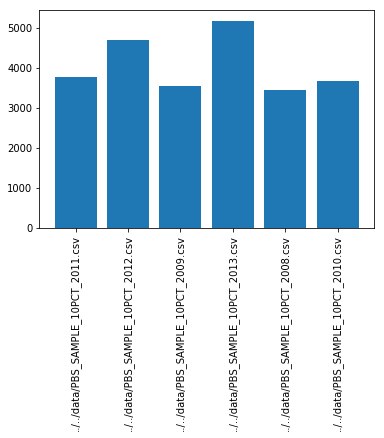

In [19]:
lengths = [len(dfy[k]) for k in dfy.keys()]
plt.bar(range(len(lengths)), lengths)
plt.xticks(range(len(lengths)), dfy.keys(), rotation='vertical')